<a href="https://colab.research.google.com/github/chinmaynadgir/DataPreprocessing-and-ML-operations/blob/main/DataMining_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Step 1 :Acquiring The Datasets and importing headers

In [ ]:
#Upload
from google.colab import files
Uploaded_files = files.upload()


Saving groceries.csv to groceries.csv
Saving insurance.csv to insurance.csv


In [ ]:
!pip install apyori
#header
import pandas as pd
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import statistics
import numpy as np
import matplotlib.pyplot as plt
import io
import math
import seaborn as sns
from apyori import apriori
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
groceries_df=pd.read_csv(io.BytesIO(Uploaded_files['groceries.csv']),header=None)
insurance_df=pd.read_csv(io.BytesIO(Uploaded_files['insurance.csv']))

## Step 2:Data Preprocessing on the Groceries Dataset

We see that the groceries dataset doesnt have headers and thus we specify the parameter header='none' while conerting it into a dataframe

In [ ]:
groceries_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,frankfurter,sausage,liver loaf,ham,chicken,beef,citrus fruit,tropical fruit,root vegetables,other vegetables,...,roll products,flour,pasta,margarine,specialty fat,sugar,soups,skin care,hygiene articles,candles
1,sausage,finished products,tropical fruit,pip fruit,other vegetables,butter,curd,dessert,butter milk,yogurt,...,waffles,cake bar,chocolate,shopping bags,NaN,NaN,NaN,NaN,NaN,NaN
2,frankfurter,ham,tropical fruit,pip fruit,root vegetables,other vegetables,whole milk,butter,curd,yogurt,...,waffles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chicken,citrus fruit,root vegetables,other vegetables,whole milk,yogurt,hard cheese,processed cheese,mayonnaise,frozen vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chicken,tropical fruit,whole milk,condensed milk,soft cheese,processed cheese,domestic eggs,white bread,pastry,semi-finished bread,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matrix_details="The matrix has rows: {rows} and columns: {columns}".format(rows=groceries_df.shape[0],columns=groceries_df.shape[1])
print(matrix_details)

The matrix has rows: 9835 and columns: 32


In [ ]:
groceries_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,margarine,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [ ]:
records = []
for i in range(0,1000):  
    records.append([str(groceries_df.values[i,j]) for j in range(0, groceries_df.shape[1])])

# Each item in the record list will include items bought by a customer
records[0]

['frankfurter',
 'sausage',
 'liver loaf',
 'ham',
 'chicken',
 'beef',
 'citrus fruit',
 'tropical fruit',
 'root vegetables',
 'other vegetables',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'whipped/sour cream',
 'beverages',
 'soft cheese',
 'hard cheese',
 'cream cheese',
 'mayonnaise',
 'domestic eggs',
 'rolls/buns',
 'roll products',
 'flour',
 'pasta',
 'margarine',
 'specialty fat',
 'sugar',
 'soups',
 'skin care',
 'hygiene articles',
 'candles']

In [ ]:
unique_items = [x for y in records for x in y]
print("Total Unique Items are %s"%(len(set(unique_items))))

Total Unique Items are 158


In [ ]:
set(unique_items)

{'Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cookware',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen meals',
 'frozen potato products',
 'frozen vegetables',
 'fr

## Step 3:Now let's build an Apriori Model on the groceries **dataset**

The association rule can be seen in three measures that express the degree of confidence in the rule
*   Support
*   Confidence
*   Lift

For our model we describe parameters as [0.008,0.3,3]

And the length of the apriori rule to be two as one doesn't make much sense in the practical aspects.




In [ ]:
association_rules = apriori(records, min_support=0.01, min_confidence=0.3, min_lift=3, min_length=2)  
association_results = list(association_rules)

In [ ]:
print("Total Rules observed in our grocery data base the support & confidence threshold is %s" %len(association_results))

Total Rules observed in our grocery data base the support & confidence threshold is 44


In [ ]:
for item in association_results:  
  pair=item[0]
  items=[x for x in pair]
  print("Rule:"+items[0]+"-->"+items[1])
  print("support:" + str(item[1]))
  print("confidence: "+str(item[2][0][2]))
  print("lift: "+str(item[2][0][3]))
  print("********************* \n")

Rule:whipped/sour cream-->berries
support:0.017
confidence: 0.3617021276595745
lift: 4.822695035460994
********************* 

Rule:root vegetables-->butter
support:0.017
confidence: 0.3617021276595745
lift: 3.2585777266628333
********************* 

Rule:citrus fruit-->sugar
support:0.014
confidence: 0.32558139534883723
lift: 3.3565092304003836
********************* 

Rule:dessert-->yogurt
support:0.013
confidence: 0.3939393939393939
lift: 3.077651515151515
********************* 

Rule:newspapers-->oil
support:0.01
confidence: 0.33333333333333337
lift: 3.7878787878787885
********************* 

Rule:root vegetables-->packaged fruit/vegetables
support:0.011
confidence: 0.3333333333333333
lift: 3.003003003003003
********************* 

Rule:tropical fruit-->pip fruit
support:0.013
confidence: 0.31707317073170727
lift: 3.235440517670482
********************* 

Rule:sliced cheese-->yogurt
support:0.011
confidence: 0.39285714285714285
lift: 3.0691964285714284
********************* 

Rule:r

We see that the apriori algorithm works well to map the association rules so as to come up with the right patterns for predictions of the sales for the business owner .

Note : Confidence , Support and length can be varied as required Nan is also used as an item in our dataset which means that the customer hasn't bought anything .

## Step 4 :Pre processing the Insurance_dataset

In [ ]:
insurance_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
matrix_details_insurance="The matrix has rows: {rows} and columns: {columns}".format(rows=insurance_df.shape[0],columns=insurance_df.shape[1])
print(matrix_details_insurance)

The matrix has rows: 1338 and columns: 7


Dividing the given dataset to 30% and 70% partitions for our use

In [ ]:
df1_r, df2_r = train_test_split(insurance_df, test_size=0.3)

In [ ]:
insurance_df.duplicated()
#we see that there are no duplicate and missing values from the data frame libraries 

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [ ]:
insurance_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Converting the 'SEX' and 'SMOKER' which is a binary categorical variable to 0 and 1

In [ ]:
insurance_df['sex'].replace(['male', 'female'],[0, 1], inplace=True)
insurance_df['smoker'].replace(['no', 'yes'],[0, 1], inplace=True)

Converting the 'REGION' which is a multi class categorical variable to one hot encoded format and then merging it back to the original dataframe

In [ ]:
one_hot=pd.get_dummies(insurance_df['region'])
insurance_df1=pd.concat([insurance_df,one_hot],axis='columns')

In [ ]:
#removing the region variable and one of the regions because if other three are 0 then this must be 1 so this just becomes redundant 
insurance_df1=insurance_df1.drop(['northeast','region'],axis='columns')

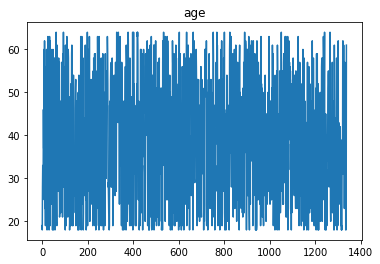

In [ ]:
insurance_df_age=insurance_df1['age']
insurance_df_expenses=insurance_df1['expenses']
insurance_df_children=insurance_df1['children']
insurance_df_bmi=insurance_df1['bmi']
insurance_df_age.plot(title='age')

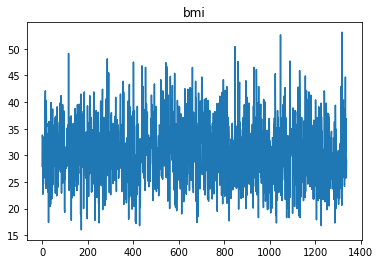

In [ ]:
insurance_df_bmi.plot(title='bmi')


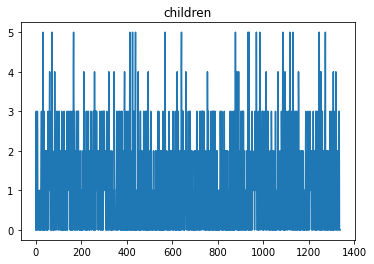

In [ ]:
insurance_df_children.plot(title='children')


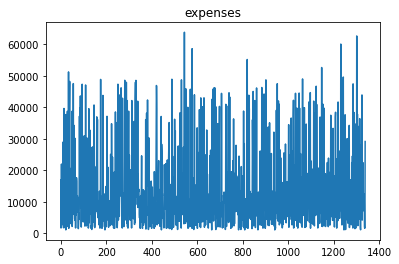

In [ ]:
insurance_df_expenses.plot(title='expenses')

We infer from the graphs that the data is in utter need of normalization and hence proceed to normalize it .

In [ ]:
df_z_scaled = insurance_df1[['age','bmi','expenses','children']].copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -df_z_scaled[column].mean()) / df_z_scaled[column].std()    

In [ ]:
insurance_df1

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
0,19,1,27.9,0,1,16884.92,0,0,1
1,18,0,33.8,1,0,1725.55,0,1,0
2,28,0,33.0,3,0,4449.46,0,1,0
3,33,0,22.7,0,0,21984.47,1,0,0
4,32,0,28.9,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,10600.55,1,0,0
1334,18,1,31.9,0,0,2205.98,0,0,0
1335,18,1,36.9,0,0,1629.83,0,1,0
1336,21,1,25.8,0,0,2007.95,0,0,1


In [ ]:
#now merging the z-score scaled data back to our dataset
insurance_df2=insurance_df1.drop(['age','bmi','children','expenses'],axis='columns')
insurance_df2=pd.concat([insurance_df2,df_z_scaled],axis='columns')

In [ ]:
insurance_df2

,sex,smoker,northwest,southeast,southwest,age,bmi,expenses,children
0,1,1,0,0,1,-1.438227,-0.453476,0.298472,-0.908274
1,0,0,0,1,0,-1.509401,0.513994,-0.953333,-0.078738
2,0,0,0,1,0,-0.797655,0.382811,-0.728402,1.580335
3,0,0,1,0,0,-0.441782,-1.306161,0.719574,-0.908274
4,0,0,1,0,0,-0.512957,-0.289498,-0.776511,-0.908274
...,...,...,...,...,...,...,...,...,...
1333,0,0,1,0,0,0.768185,0.054855,-0.220468,1.580335
1334,1,0,0,0,0,-1.509401,0.202436,-0.913661,-0.908274
1335,1,0,0,1,0,-1.509401,1.022325,-0.961237,-0.908274
1336,1,0,0,0,1,-1.295877,-0.797830,-0.930013,-0.908274


## Step 5: Now running K-means on the insurance dataset to perform customer segmentation

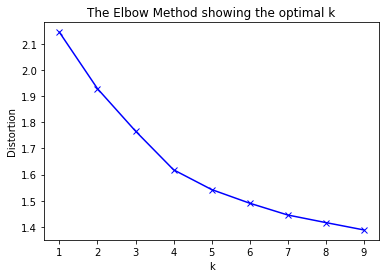

In [ ]:
def elobowmethod():    
    
    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(insurance_df2)
        kmeanModel.fit(insurance_df2)
        distortions.append(sum(np.min(cdist(insurance_df2,kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /insurance_df2.shape[0])
# Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
elobowmethod()

[[ 3.65384615e-01  9.48717949e-01  1.66666667e-01  3.91025641e-01
   2.30769231e-01  3.54522561e-02  7.66267272e-01  2.28953301e+00
   3.29305981e-02]
 [ 5.30503979e-01  1.03448276e-01  2.46684350e-01  2.70557029e-01
   2.33421751e-01 -1.03005824e+00 -3.51696750e-01 -6.59417391e-01
  -6.02423804e-01]
 [ 5.08417508e-01  1.34680135e-01  2.99663300e-01  1.71717172e-01
   2.65993266e-01 -1.18592057e-02 -3.54482071e-01 -2.00494359e-01
   1.37923516e+00]
 [ 5.06726457e-01 -2.77555756e-17  1.25560538e-01  4.57399103e-01
   2.42152466e-01  5.30724039e-01  1.24998233e+00 -2.91902910e-01
  -1.45695839e-01]
 [ 4.94736842e-01  1.64912281e-01  3.12280702e-01  1.68421053e-01
   2.38596491e-01  9.40253075e-01 -5.62852292e-01  5.64013332e-02
  -5.44442347e-01]]


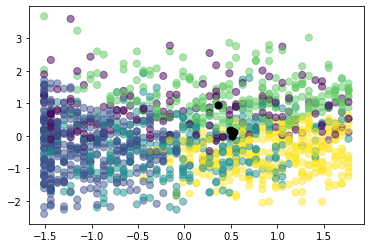

In [ ]:
kmeans = KMeans(n_clusters=5).fit(insurance_df2)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(insurance_df2['age'],insurance_df2['bmi'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
plt.show()

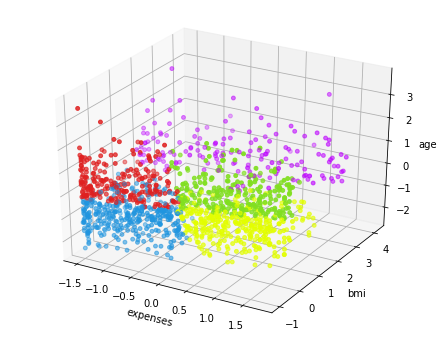

In [ ]:
#a 3D visualiztion so that we can recognize the clusters better
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

colors=['#DF2020', '#81DF20', '#2095DF','#e3ff00','#bd00ff']
insurance_df2['cluster'] = kmeans.fit_predict(insurance_df2[['age', 'bmi', 'expenses']])
insurance_df2['c'] = insurance_df2.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(insurance_df2.age, insurance_df2.expenses, insurance_df2.bmi, c=insurance_df2.c, s=15)
ax.set_xlabel('expenses')
ax.set_ylabel('bmi')
ax.set_zlabel('age')
plt.show()

Thus the K-means clustered data is used as a customer segmented result for the given insurance dataset and helps the company make decisions based on the cluster a given person belongs to .